<a href="https://colab.research.google.com/github/chxnmay17/SPPU-ML-Laboratory/blob/main/pract4mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Data Head ---
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63      

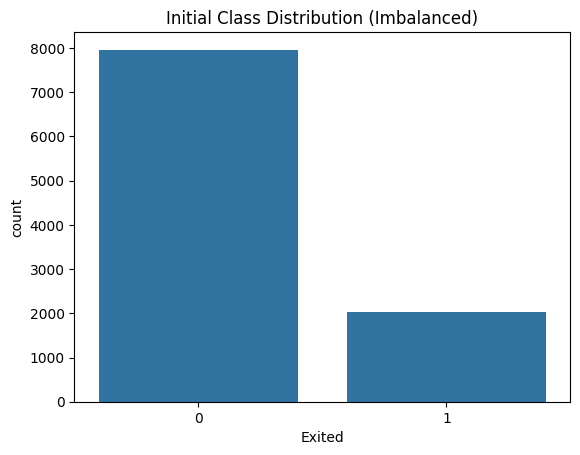


Training set shape (Imbalanced): (7500, 8)
Test set shape (Imbalanced): (2500, 8)

--- EVALUATION (IMBALANCED DATA) ---
Accuracy Score: 0.8228

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500


Confusion Matrix:


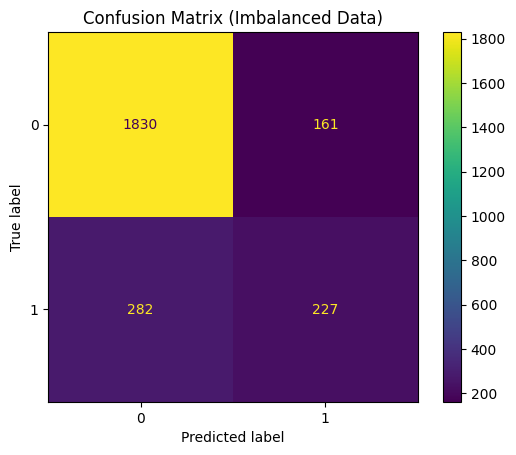


--- IMPROVEMENT: RESAMPLING DATA ---

--- Resampled Target Class Distribution (Balanced) ---
Exited
1    7963
0    7963
Name: count, dtype: int64


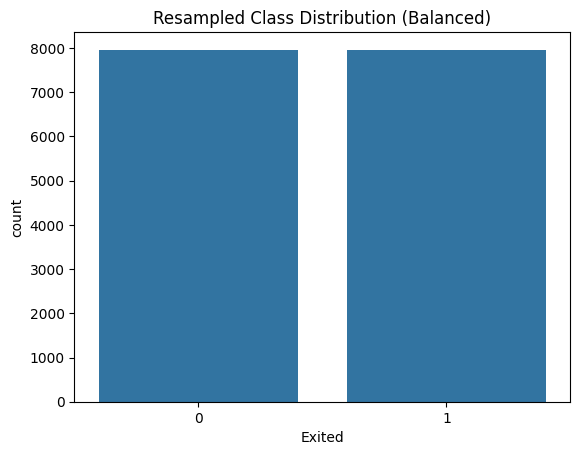


Training set shape (Resampled): (11944, 8)
Test set shape (Resampled): (3982, 8)

--- EVALUATION (RESAMPLED DATA) ---
Accuracy Score: 0.865143144148669

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982


Confusion Matrix:


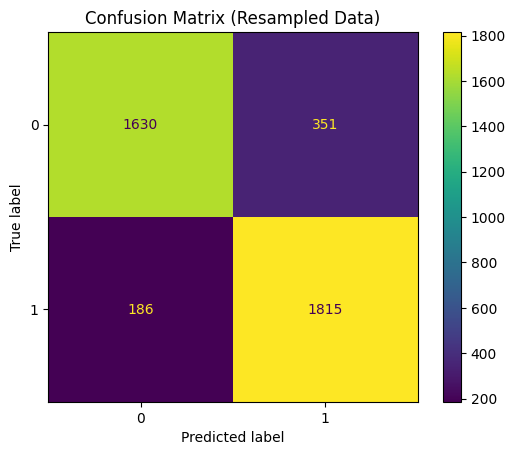

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

# -------------------------------------------------------------------
# 1. READ THE DATASET
# -------------------------------------------------------------------

# --- IMPORTANT ---
# You must change this file path to match the location of the dataset on your computer.
# The dataset can be found here: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
#
# For this code to run, rename your file to "Bank_Customer_Churn.csv"
# and place it in the same directory as your notebook, or update the path below.
file_path = "Churn_Modelling.csv"
df = pd.read_csv(file_path)

print("--- Data Head ---")
print(df.head())
print("\n--- Data Shape ---")
print(df.shape)

# -------------------------------------------------------------------
# 2. DISTINGUISH FEATURE AND TARGET SET
# -------------------------------------------------------------------

# Input data (features)
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# Output data (target)
y = df['Exited']

print("\n--- Initial Target Class Distribution (Imbalanced) ---")
print(y.value_counts())
sns.countplot(x=y)
plt.title("Initial Class Distribution (Imbalanced)")
plt.show()

# -------------------------------------------------------------------
# 3. NORMALIZE AND SPLIT (INITIAL MODEL)
# -------------------------------------------------------------------

# Normalize features
scaler_imbalanced = StandardScaler()
x_scaled = scaler_imbalanced.fit_transform(x)

# Divide the data set into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

print(f"\nTraining set shape (Imbalanced): {x_train.shape}")
print(f"Test set shape (Imbalanced): {x_test.shape}")

# -------------------------------------------------------------------
# 4. INITIALIZE AND BUILD THE MODEL (IMBALANCED DATA)
# -------------------------------------------------------------------

ann_imbalanced = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100, activation='relu')
ann_imbalanced.fit(x_train, y_train)

# -------------------------------------------------------------------
# 5. PRINT ACCURACY AND CONFUSION MATRIX (IMBALANCED DATA)
# -------------------------------------------------------------------

y_pred = ann_imbalanced.predict(x_test)

print("\n--- EVALUATION (IMBALANCED DATA) ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (Imbalanced Data)")
plt.show()

# -------------------------------------------------------------------
# 4 (Part 2). IDENTIFY IMPROVEMENT: HANDLE CLASS IMBALANCE
# -------------------------------------------------------------------

print("\n--- IMPROVEMENT: RESAMPLING DATA ---")
ros = RandomOverSampler(random_state=0)

# Resample the original (non-scaled) features and target
x_res, y_res = ros.fit_resample(x, y)

print("\n--- Resampled Target Class Distribution (Balanced) ---")
print(y_res.value_counts())
sns.countplot(x=y_res)
plt.title("Resampled Class Distribution (Balanced)")
plt.show()


# -------------------------------------------------------------------
# 3 (Part 2). NORMALIZE AND SPLIT (RESAMPLED MODEL)
# -------------------------------------------------------------------

# Normalize the resampled features
scaler_resampled = StandardScaler()
x_scaled_res = scaler_resampled.fit_transform(x_res)

# Split the resampled data
x_train, x_test, y_train, y_test = train_test_split(x_scaled_res, y_res, random_state=0, test_size=0.25)

print(f"\nTraining set shape (Resampled): {x_train.shape}")
print(f"Test set shape (Resampled): {x_test.shape}")

# -------------------------------------------------------------------
# 4 (Part 3). INITIALIZE AND BUILD THE MODEL (RESAMPLED DATA)
# -------------------------------------------------------------------

ann_resampled = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100, activation='relu')
ann_resampled.fit(x_train, y_train)

# -------------------------------------------------------------------
# 5 (Part 2). PRINT ACCURACY AND CONFUSION MATRIX (RESAMPLED DATA)
# -------------------------------------------------------------------

y_pred = ann_resampled.predict(x_test)

print("\n--- EVALUATION (RESAMPLED DATA) ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (Resampled Data)")
plt.show()